# Season Sales Data Analysis

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the data is dataframe named df

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Dropping the columns which are not needed for my analysis

In [5]:
df.drop(["Status","unnamed1"], axis = 1, inplace = True)

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace = True)

### Changing the data type of Amount column from float to integrer

In [8]:
df["Amount"] = pd.to_numeric(df["Amount"], errors='coerce').astype('int64')

### Now, lets see some descriptive statistics for the numerical variables in the dataset in hand

In [9]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [10]:
df[["Age","Orders","Amount"]].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA (Exploratory Data Analysis) of the data :

## On basis of Gender

#### Plotting a bar chart for Gender and count of orders

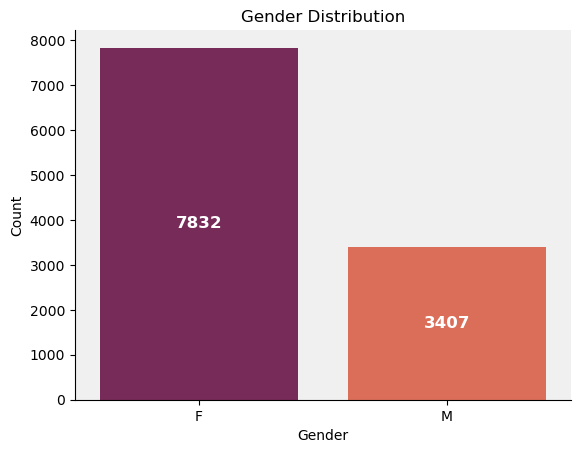

In [11]:
# Creating the bar chart
ax = sns.countplot(x='Gender', data=df, palette='rocket')

# Adding data labels to the bars with custom font properties
for bars in ax.containers:
    ax.bar_label(bars, label_type='center', fontsize=12, fontweight='bold', color='white')

# Setting the plot title and labels
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Setting the background color of the plot
ax.set_facecolor('#f0f0f0')

# Removing the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [12]:
# Group data and calculate total amount by gender
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [13]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


#### Plotting a bar chart for Gender and Amount spent of all of the orders

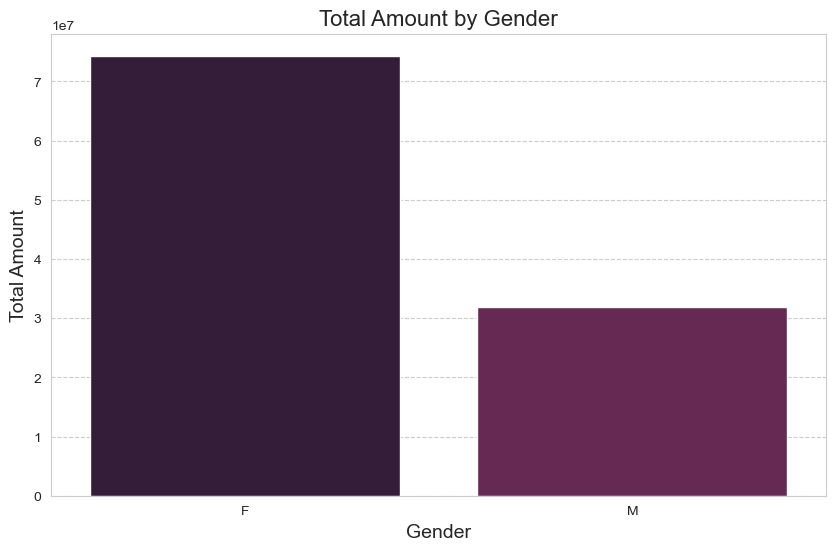

In [14]:
color_palette = sns.color_palette("rocket")

# Setting the seaborn style to "whitegrid"
sns.set_style("whitegrid")

# Setting up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Gender', y='Amount', data=sales_gen, palette=color_palette)

# Adding labels and title
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Total Amount", fontsize=14)
plt.title("Total Amount by Gender", fontsize=16)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', zorder = 0)

plt.show()

## On the basis of Age

#### Plotting a bar chart for Age and count of orders

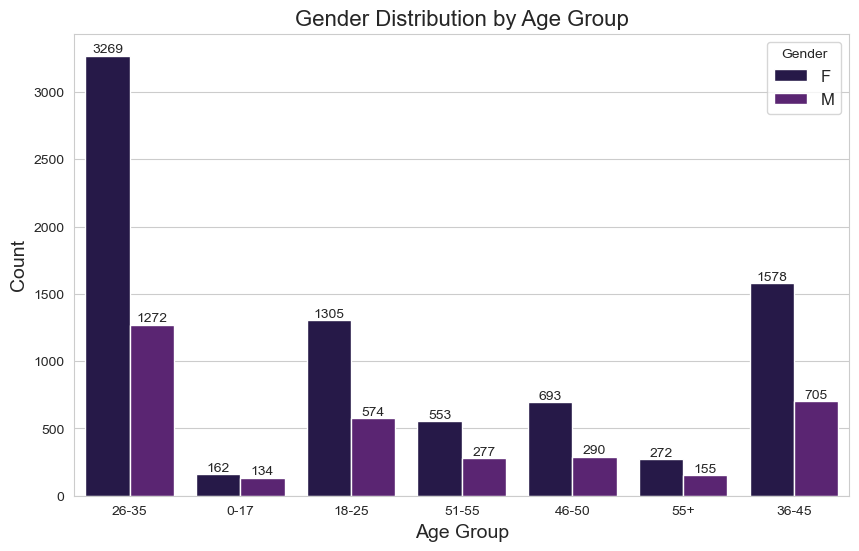

In [15]:
color_palette = sns.color_palette("magma")

# Setting up the figure and axis
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette=color_palette)

# Adding labels and title
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Gender Distribution by Age Group", fontsize=16)

# Customizing legend and legend title
plt.legend(title="Gender", fontsize=12)

# Adding labels for the bars
for bars in ax.containers:
    ax.bar_label(bars, label_type='edge', fontsize=10)

plt.show()

In [16]:
# Total Amount vs Age Group
sales_age = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by = "Amount", ascending=False)

In [17]:
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


#### Plotting a bar chart for Gender and total amount spent

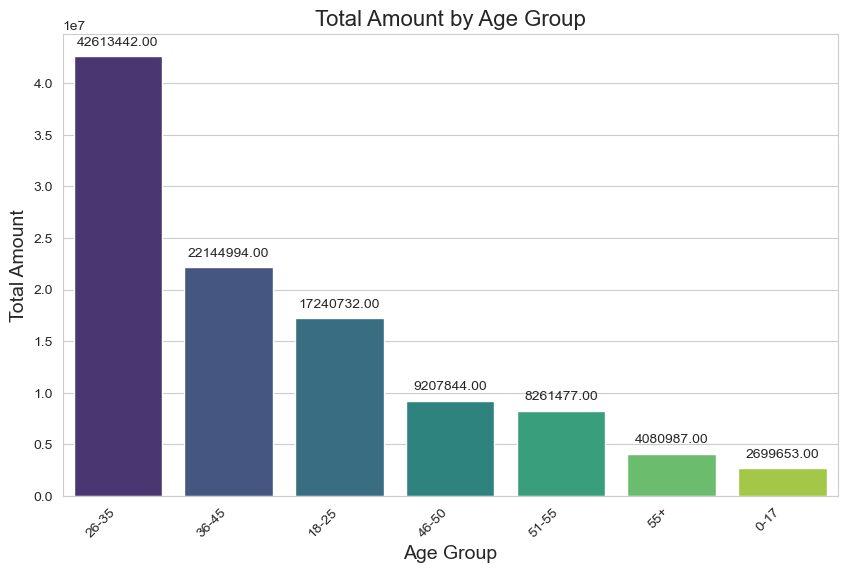

In [18]:
color_palette = sns.color_palette("viridis", n_colors=len(sales_age['Age Group']))

# Setting up the figure and axis
plt.figure(figsize=(10, 6))

# Creating the bar plot
ax = sns.barplot(x='Age Group', y='Amount', data=sales_age, palette=color_palette)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Total Amount", fontsize=14)
plt.title("Total Amount by Age Group", fontsize=16)

plt.show()

## On the basis of State

In [19]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [20]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


#### Plotting a bar chart for State and count of orders

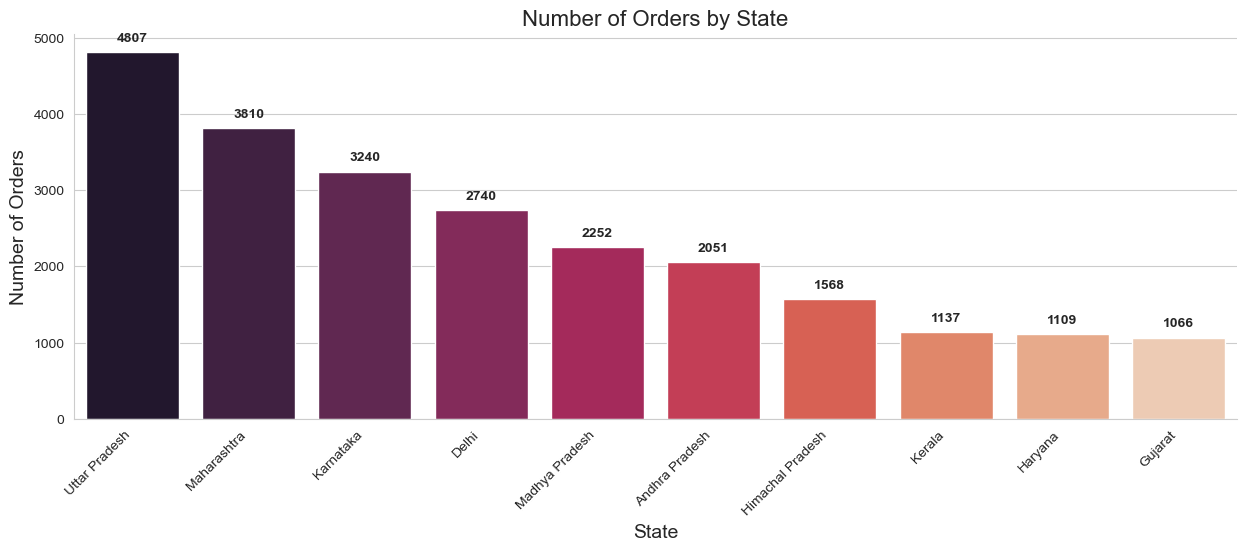

In [21]:
color_palette = sns.color_palette("rocket", n_colors=len(sales_state["State"]))

# Sort the data by 'Orders' column in descending order
sales_state_sorted = sales_state.sort_values(by = "Orders", ascending = False)

# Setting up the figure and axis with a larger size
plt.figure(figsize=(15, 5))

# Create the bar plot
ax = sns.barplot(data = sales_state_sorted, x = "State", y = "Orders", palette = color_palette)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points", weight = "bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45, ha = "right")

# Adding labels and title
plt.xlabel("State", fontsize = 14)
plt.ylabel("Number of Orders", fontsize = 14)
plt.title("Number of Orders by State", fontsize = 16)

# Remove the top and right spines
sns.despine()

plt.show()

In [22]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

In [23]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


#### Plotting a bar chart for State and total amount of sales

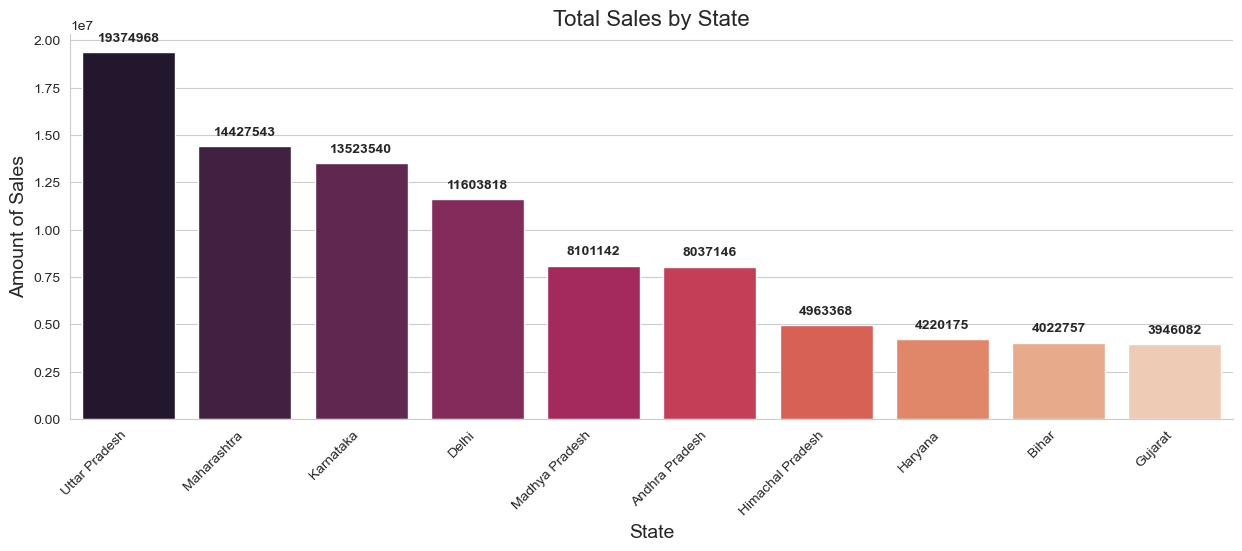

In [24]:
color_palette = sns.color_palette("rocket", n_colors=len(sales_state["State"]))

# Sort the data by 'Amount' column in descending order
sales_state_sorted = sales_state.sort_values(by="Amount", ascending=False)

# Setting up the figure and axis with a larger size
plt.figure(figsize=(15, 5))

# Create the bar plot
ax = sns.barplot(data = sales_state, x = "State", y = "Amount", palette=color_palette)

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = "center", va = "center", xytext = (0, 10), textcoords = "offset points", weight = "bold")

# Rotate x-axis labels for better readability
plt.xticks(rotation = 45, ha = "right")

# Adding labels and title
plt.xlabel("State", fontsize = 14)
plt.ylabel("Amount of Sales", fontsize = 14)
plt.title("Total Sales by State", fontsize = 16)

# Remove the top and right spines
sns.despine()

plt.show()

## On the basis of Maritial Status

#### Plotting a bar chart for Maritial status and count of orders

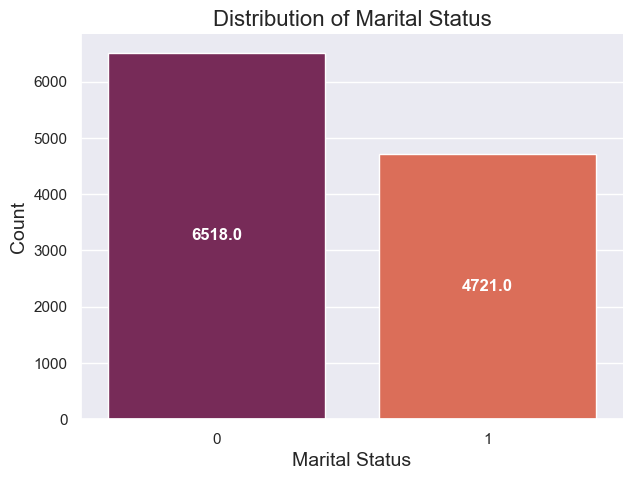

In [25]:
sns.set(rc={'figure.figsize': (7, 5)})

# Create the countplot with 'rocket' palette
ax = sns.countplot(data=df, x='Marital_Status', palette='rocket')

# Add centered, bold, and black data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2., f'{height}', ha='center', va='center', fontsize=12,
            fontweight='bold', color='white')

# Adding labels and title
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Marital Status", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

In [26]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [27]:
sales_state

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


#### Plotting a bar chart for Maritial status and total amount spent

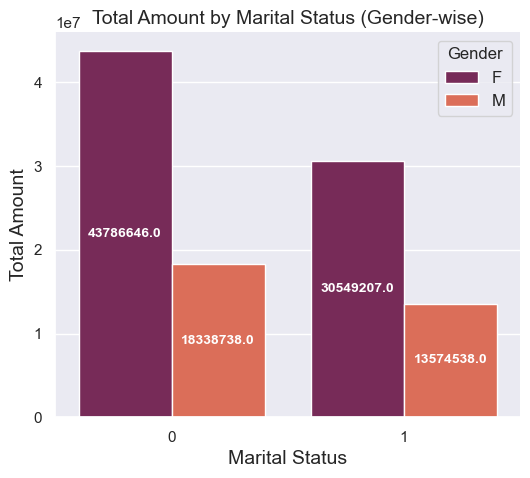

In [28]:
sns.set(rc={'figure.figsize': (6, 5)})

# Creating the bar plot with hue for Gender
ax = sns.barplot(data=sales_state, x='Marital_Status', y='Amount', hue='Gender', palette='rocket')

# Adding data labels in each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height / 2., f'{height}', ha='center', va='center', fontsize=10,
            fontweight='bold', color='white')

# Adding labels and title
plt.xlabel("Marital Status", fontsize=14)
plt.ylabel("Total Amount", fontsize=14)
plt.title("Total Amount by Marital Status (Gender-wise)", fontsize=14)

# Removing the top and right spines
sns.despine()

# Adding a legend
plt.legend(title='Gender', title_fontsize=12, fontsize=12, loc='upper right')

plt.show()

## On the basis of Occupation

#### Plotting a bar chart for Occupation and count of orders

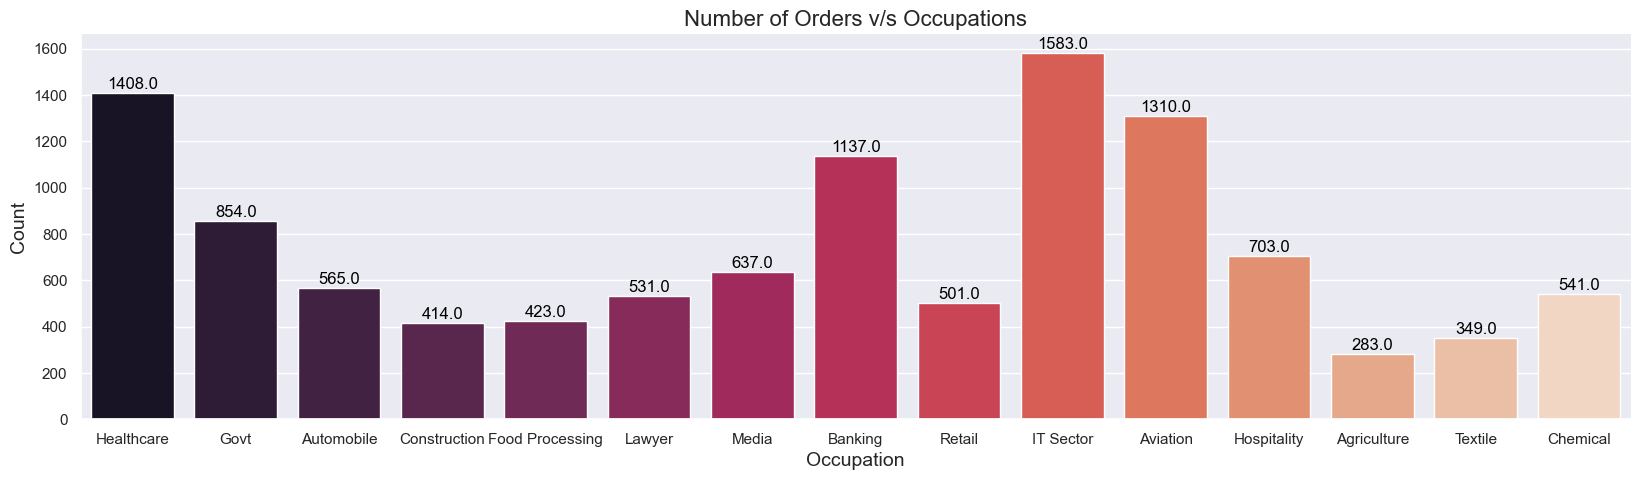

In [29]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the countplot with 'rocket' palette
ax = sns.countplot(data=df, x='Occupation', palette='rocket')

# Add data labels outside each bar in black color
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}', ha='center', va='bottom', fontsize=12, color='black')

# Adding labels and title
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Orders v/s Occupations", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

In [30]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

In [31]:
sales_state

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


#### Plotting a bar chart for Occupation and total amount spent

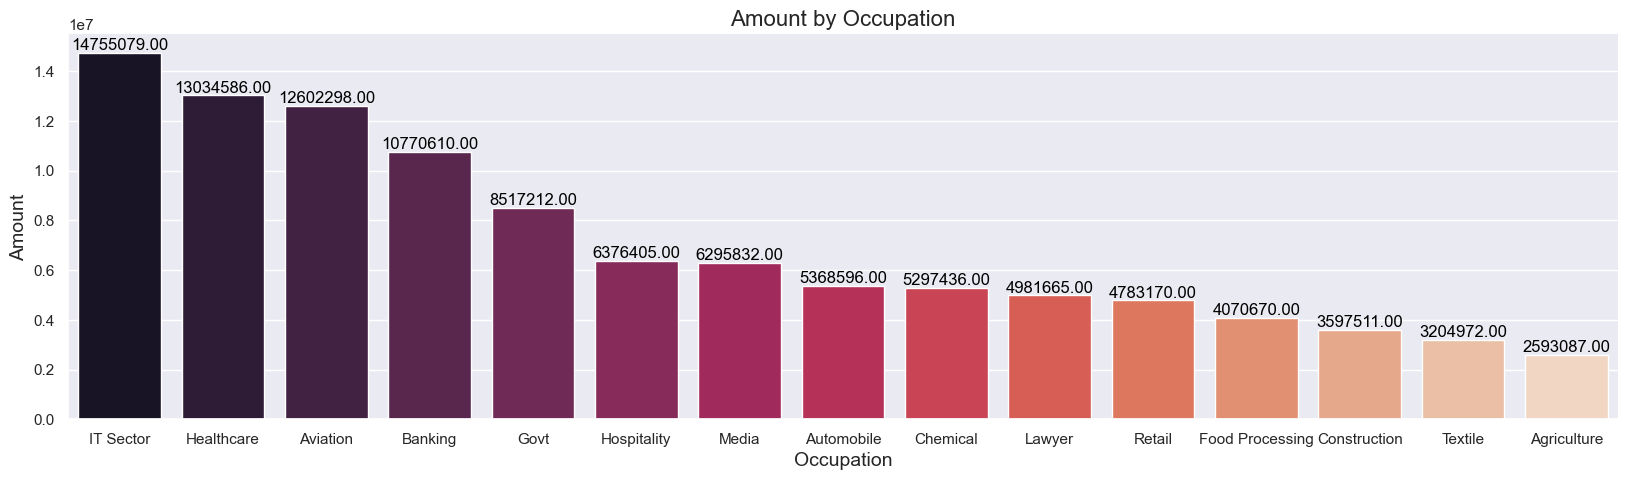

In [32]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the bar plot with 'rocket' palette
ax = sns.barplot(data=sales_state, x='Occupation', y='Amount', palette='rocket')

# Add data labels outside each bar in black color
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Adding labels and title
plt.xlabel("Occupation", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.title("Amount by Occupation", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

## On the basis of  Product Category

#### Plotting a bar chart for Product Category and count of orders

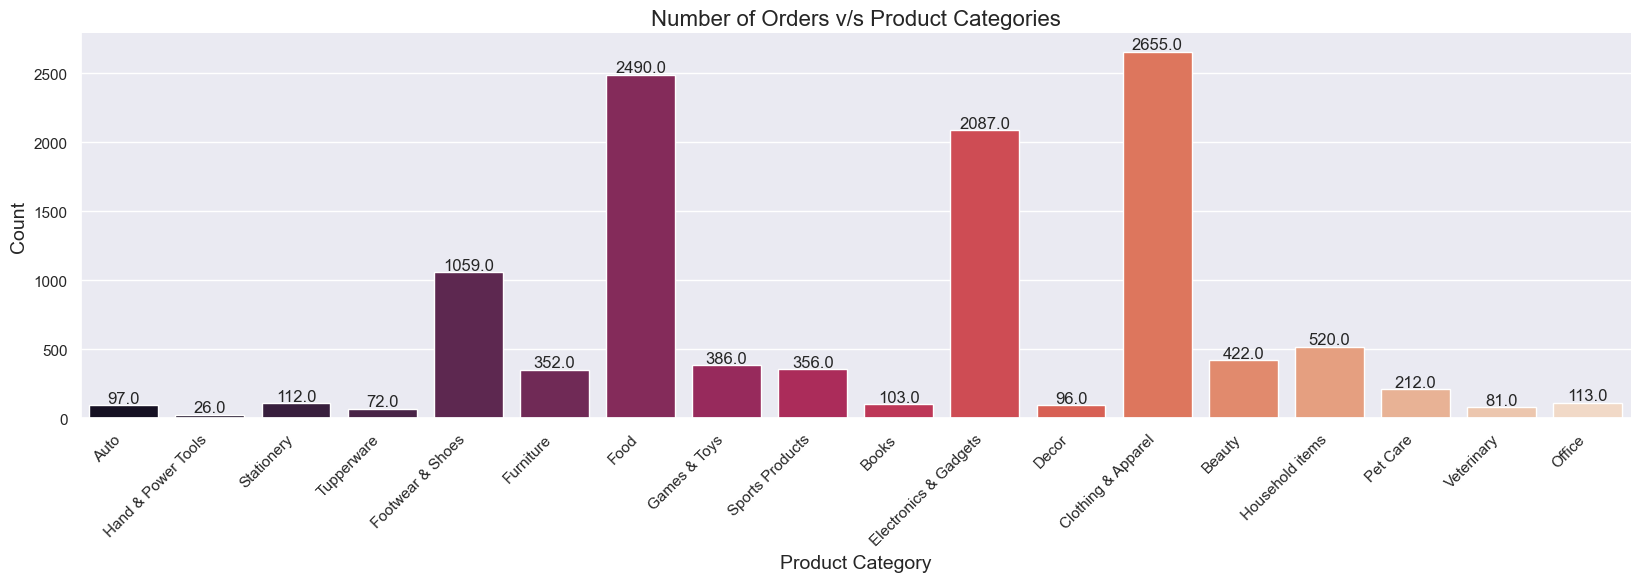

In [33]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the countplot with 'rocket' palette
ax = sns.countplot(data=df, x='Product_Category', palette='rocket')

# Add data labels above each bar with count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding labels and title
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Number of Orders v/s Product Categories", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

In [34]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

In [35]:
sales_state

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


#### Plotting a bar chart for Product Category andtotal amount spent

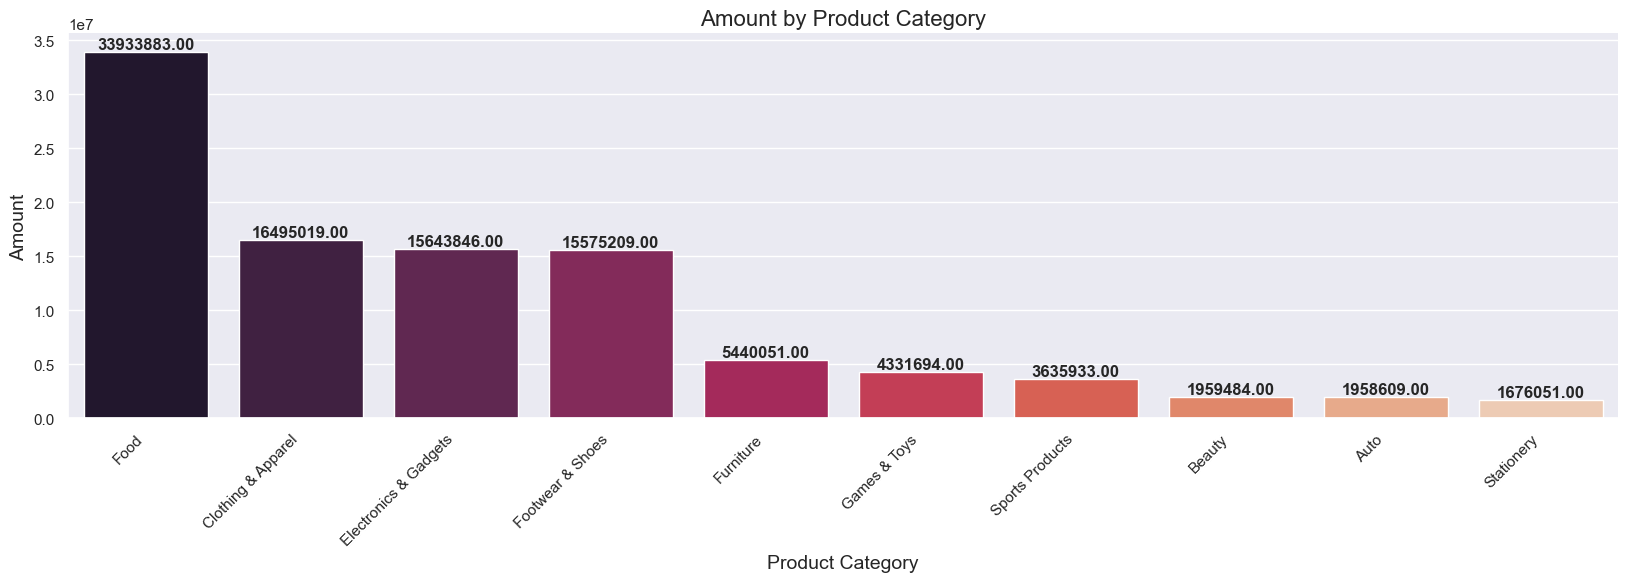

In [36]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the bar plot with 'rocket' palette
ax = sns.barplot(data=sales_state, x='Product_Category', y='Amount', palette='rocket')

# Customize x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight = "bold")

# Adding labels and title
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Amount", fontsize=14)
plt.title("Amount by Product Category", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

## On the basis of Product ID

In [37]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

In [38]:
sales_state

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


#### Plotting a bar chart for Product ID and count of orders

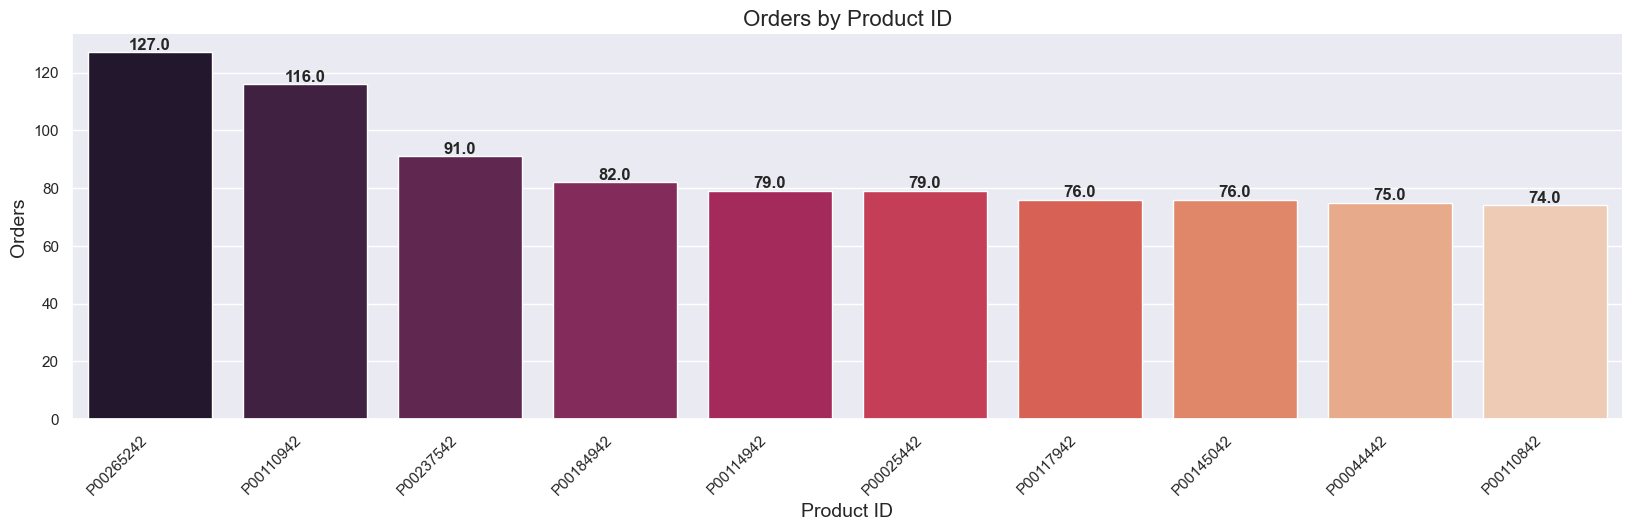

In [39]:
sns.set(rc={'figure.figsize': (20, 5)})

# Create the bar plot with 'rocket' palette
ax = sns.barplot(data=sales_state, x='Product_ID', y='Orders', palette='rocket')

# Customize x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12, weight = "bold")

# Adding labels and title
plt.xlabel("Product ID", fontsize=14)
plt.ylabel("Orders", fontsize=14)
plt.title("Orders by Product ID", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

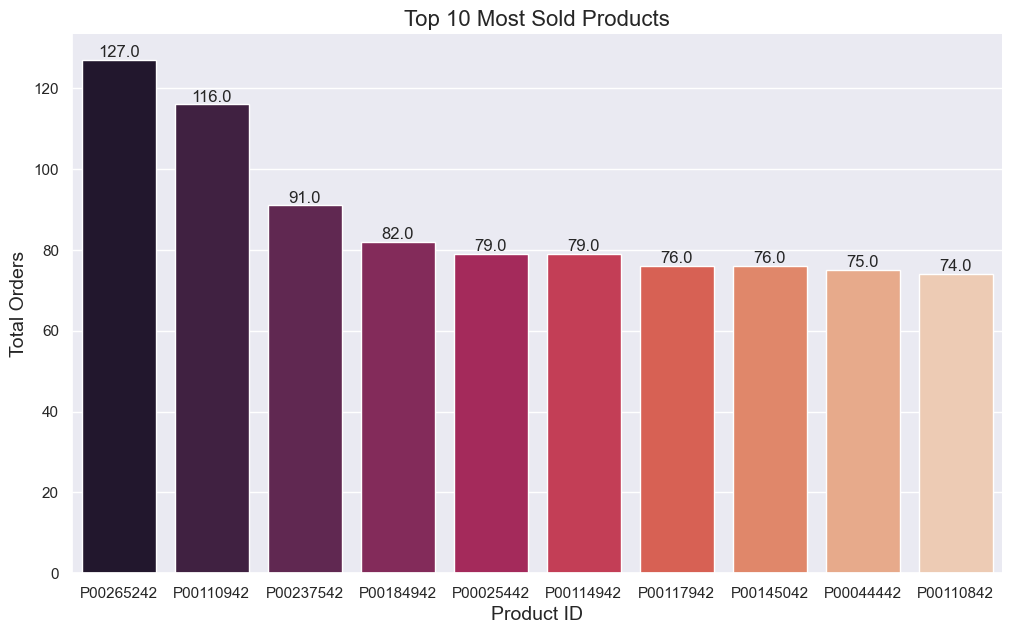

In [40]:
top_10_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)

# Setting the seaborn style and figure size
sns.set(rc={'figure.figsize': (12, 7)})

# Create the bar plot with 'rocket' palette
ax = sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='rocket')

# Adding data labels above each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

# Adding labels and title
plt.xlabel("Product ID", fontsize=14)
plt.ylabel("Total Orders", fontsize=14)
plt.title("Top 10 Most Sold Products", fontsize=16)

# Remove the top and right spines
sns.despine()

plt.show()

## Conclusion :

### Married women aged between 26-35 years working in IT, Healthcare, and Aviation sectors, residing in Uttar Pradesh, Maharashtra, and Karnataka, show a higher likelihood of purchasing products from the Food, Clothing, and Electronics categories.